### 가정: 시청이력의 날보다 이른날의 비디오는 가중치가 낮을것이다.
1. 처음 비디오를 시청한 이력보다 낮은 날짜는 랭킹을 낮게한다.

In [1]:
import sys
sys.path.append("../../sktnb_code_challenge/ttuckbaegi3/metrics")
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('../../movie_list_label.tsv',sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393187 entries, 0 to 393186
Data columns (total 2 columns):
USER_ID       393187 non-null int64
movie_list    393187 non-null object
dtypes: int64(1), object(1)
memory usage: 6.0+ MB


In [3]:
df.head()

,USER_ID,movie_list
0,97140,"[2085, 3754, 1057, 1068, 2034, 8032, 3851, 265..."
1,176329,"[4155, 1720, 6561, 7441, 5026, 3262, 29, 7693,..."
2,184938,"[7382, 1520, 3705, 6024, 8084, 2420, 8158, 200..."
3,162887,"[3477, 829, 3549, 4007, 5354, 5199, 2537, 2658..."
4,327858,"[845, 6428, 4820, 28, 8075, 3987, 1697, 364, 6..."


In [4]:
def str2list(x):
    return list(map(int, x.replace('[','')\
                          .replace(']','')\
                          .replace(' ','')\
                          .split(',')))

In [5]:
str2list(df.iloc[0]['movie_list'])

[2085,
 3754,
 1057,
 1068,
 2034,
 8032,
 3851,
 2658,
 2895,
 1566,
 5533,
 1559,
 1032,
 3956,
 4949,
 845,
 1371,
 3987,
 6290,
 1645,
 5026,
 3574,
 5382,
 7864,
 1400,
 7824,
 5775,
 1330,
 2119,
 2229,
 6411]

In [6]:
%%time
df['movie_list'] = df['movie_list'].apply(str2list)
df['movie_list_len'] = df['movie_list'].apply(len)

CPU times: user 2.23 s, sys: 86.4 ms, total: 2.32 s
Wall time: 2.32 s


In [7]:
df.head()

,USER_ID,movie_list,movie_list_len
0,97140,"[2085, 3754, 1057, 1068, 2034, 8032, 3851, 265...",31
1,176329,"[4155, 1720, 6561, 7441, 5026, 3262, 29, 7693,...",28
2,184938,"[7382, 1520, 3705, 6024, 8084, 2420, 8158, 200...",31
3,162887,"[3477, 829, 3549, 4007, 5354, 5199, 2537, 2658...",26
4,327858,"[845, 6428, 4820, 28, 8075, 3987, 1697, 364, 6...",26


In [8]:
user_hist = pd.read_csv('../../ sample.csv')
user_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15823019 entries, 0 to 15823018
Data columns (total 5 columns):
USER_ID      int64
MOVIE_ID     int64
DURATION     int64
WATCH_DAY    int64
WATCH_SEQ    int64
dtypes: int64(5)
memory usage: 603.6 MB


In [9]:
movie_meta_df = pd.read_csv('../../sample_movie_meta.tsv',sep='\t',encoding='utf-8')
movie_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8259 entries, 0 to 8258
Data columns (total 3 columns):
MOVIE_ID         8259 non-null int64
TITLE            8259 non-null object
RELEASE_MONTH    8259 non-null int64
dtypes: int64(2), object(1)
memory usage: 193.6+ KB


In [10]:
movie_meta_df.head()

,MOVIE_ID,TITLE,RELEASE_MONTH
0,0,명량: 회오리 바다를 향하여,201612
1,1,뜨거운 욕망,201801
2,2,비비안 마이어를 찾아서,201603
3,3,황야의 은화 1불,201701
4,4,코뿔소의 계절,201511


In [11]:
movie_meta_df.loc[movie_meta_df['RELEASE_MONTH'] == 101,'RELEASE_MONTH'] = 201801

In [12]:
movie_meta_df[movie_meta_df['RELEASE_MONTH'] == 101]

,MOVIE_ID,TITLE,RELEASE_MONTH


In [13]:
user_hist['watch_month'] = user_hist['WATCH_DAY'].astype(int).apply(lambda x: x//100)
user_hist

,USER_ID,MOVIE_ID,DURATION,WATCH_DAY,WATCH_SEQ,watch_month
0,0,5375,1,20170815,1,201708
1,0,5375,19,20170815,2,201708
2,0,5375,1,20170815,3,201708
3,0,5375,4,20170815,4,201708
4,0,5375,11,20170815,5,201708
5,0,5375,17,20170815,6,201708
6,0,5375,4,20170815,7,201708
7,0,5375,1,20170815,8,201708
8,0,5375,1,20170815,9,201708
9,0,5375,1,20170816,1,201708


In [14]:
merged_df = user_hist.merge(movie_meta_df, left_on='MOVIE_ID', right_on='MOVIE_ID', how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15823019 entries, 0 to 15823018
Data columns (total 8 columns):
USER_ID          int64
MOVIE_ID         int64
DURATION         int64
WATCH_DAY        int64
WATCH_SEQ        int64
watch_month      int64
TITLE            object
RELEASE_MONTH    int64
dtypes: int64(7), object(1)
memory usage: 1.1+ GB


In [15]:
merged_df['diff'] = merged_df['watch_month'] - merged_df['RELEASE_MONTH']

/Users/1003874/anaconda/envs/nlp/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


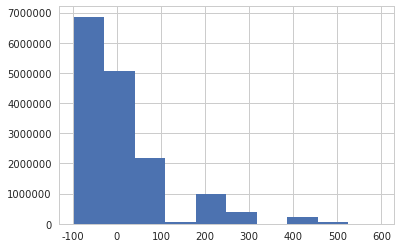

In [16]:
merged_df['diff'].hist()

편성날짜와 시청날짜의 간격이 짧은 경우가 많음
user의 마지막날짜를 기반으로 차이를 빼서 절대값을 취하고 정렬

In [17]:
# %%time
# last_watch_result = []
# for i, index in enumerate(user_hist['USER_ID'].value_counts().index):
#     if i % 1000 == 0:
#         print(i, index)
        
#     sub = user_hist[user_hist['USER_ID'] == index].sort_values(['WATCH_DAY', 'WATCH_SEQ'])
#     last_watch_day = sub.iloc[10]['watch_month']
#     last_watch_result.append((index,last_watch_day))

In [18]:
# result_df = pd.DataFrame(last_watch_result,columns=['USER_ID','last_watch'])
# result_df.head()

In [19]:
#result_df.to_csv("last_watch.tsv",sep='\t',index=False)

In [20]:
last_watch_df = pd.read_csv('last_watch.tsv',sep='\t')
last_watch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393187 entries, 0 to 393186
Data columns (total 2 columns):
USER_ID       393187 non-null int64
last_watch    393187 non-null int64
dtypes: int64(2)
memory usage: 6.0 MB


### user_id 기반 k-fold

In [45]:
import time

In [46]:
from sklearn.model_selection import train_test_split
from average_precision import mapk

In [47]:
last_watch_df['movie_list'] = df['movie_list']

In [48]:
train, test = train_test_split(last_watch_df,test_size=0.2, random_state=int(time.time()))
train_user_hist = user_hist.merge(train, left_on='USER_ID', right_on='USER_ID', how='inner')
    
answer = user_hist['MOVIE_ID'].value_counts()[:50]

In [49]:
answer.sort_index()

28      160458
583      70692
603      75731
824     205403
884      65760
1068    154346
1330    246951
1371     78186
1400     84853
1645    100367
1720     63934
2051    104590
2119     83169
2340    173508
2420    194055
2493     78246
2608    321895
2929     65634
3212     73363
3549    126036
3612     60181
3851    454841
3956    140777
3987    134408
4009     87497
4078    120051
4129    130155
4130    224679
4248     56473
4426     80999
4820    157495
4949     70827
4959     82502
5026    655185
5375    177818
5382    109533
5657     61487
5694    126353
5746    123112
5775    292524
6411     83358
6428    148621
6561     67659
6908    158149
7285     81478
7322    259236
7382    202124
7691     77974
7812     57023
8084    141034
Name: MOVIE_ID, dtype: int64

In [50]:
movie_meta_df['view_count'] = answer
movie_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 28 to 8084
Data columns (total 6 columns):
MOVIE_ID         50 non-null int64
TITLE            50 non-null object
RELEASE_MONTH    50 non-null int64
view_count       50 non-null int64
last_watch       50 non-null int64
diff             50 non-null int64
dtypes: int64(5), object(1)
memory usage: 2.7+ KB


In [51]:
movie_meta_df.dropna(subset=['view_count'],inplace=True)

In [52]:
movie_meta_df

,MOVIE_ID,TITLE,RELEASE_MONTH,view_count,last_watch,diff
28,28,불한당: 나쁜 놈들의 세상,201801,160458,201711,90
583,583,사랑하기 때문에,201705,70692,201711,6
603,603,심야식당(2015),201601,75731,201711,110
824,824,닥터 스트레인지,201801,205403,201711,90
884,884,위험한 상견례 2,201801,65760,201711,90
1068,1068,악녀[SKT 고객 전용관],201801,154346,201711,90
1330,1330,살인자의 기억법,201801,246951,201711,90
1371,1371,널 기다리며,201701,78186,201711,10
1400,1400,미옥,201801,84853,201711,90
1645,1645,로마의 휴일(2017),201801,100367,201711,90


In [53]:
def make_predicted(last_watch,movie_meta_df,index):
    if index % 1000 == 0:
        print(index)
    movie_meta_df['last_watch'] = last_watch
    movie_meta_df['diff'] = movie_meta_df['last_watch'] - movie_meta_df['RELEASE_MONTH']
    movie_meta_df['diff'] = movie_meta_df['diff'].apply(np.abs)
    return movie_meta_df.sort_values(['view_count','view_count'])['MOVIE_ID'].tolist()

In [54]:
make_predicted(201709,movie_meta_df,1000)

1000


[4959,
 3612,
 6561,
 7691,
 4009,
 5657,
 583,
 6411,
 4820,
 1720,
 3956,
 4949,
 1371,
 4248,
 7812,
 2929,
 884,
 3212,
 2493,
 4426,
 7285,
 2119,
 1400,
 1645,
 2051,
 5382,
 4078,
 5746,
 3549,
 5694,
 4129,
 3987,
 8084,
 6428,
 1068,
 6908,
 28,
 2340,
 2420,
 7382,
 824,
 4130,
 1330,
 7322,
 5775,
 2608,
 3851,
 5026,
 5375,
 603]

In [55]:
test.reset_index(inplace=True)
test.drop(['index'],axis=1,inplace=True)
test

/Users/1003874/anaconda/envs/nlp/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,USER_ID,last_watch,movie_list
0,360260,201801,"[6428, 3945, 4820, 410, 4388]"
1,46070,201801,"[5026, 7360]"
2,117841,201708,"[1566, 1571, 3174, 285, 3205, 7285, 6275, 2000..."
3,304460,201712,"[3851, 4820]"
4,117539,201709,"[6832, 4009, 1720, 2537, 5764, 4853, 2181]"
5,356468,201712,"[1330, 5775, 2608, 2340, 5026, 2929, 2559, 4248]"
6,70770,201710,"[5097, 6716, 1720, 4009, 469, 3995, 2770, 4023..."
7,185968,201709,"[2953, 4023, 3851, 2770, 4009, 1904, 620, 2621..."
8,20001,201711,"[7322, 3851, 1371, 2608, 5026]"
9,1452,201801,"[3167, 2608]"


In [56]:
test.reset_index(inplace=True)

In [57]:
%%time
test['answer'] = test.apply(lambda row: make_predicted(row.last_watch, movie_meta_df,row['index']),axis=1)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
CPU times: user 2min 13s, sys: 899 ms, total: 2min 14s
Wall time: 2min 15s


/Users/1003874/anaconda/envs/nlp/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [58]:
actual = test['movie_list'].tolist()
predicted = test['answer'].tolist()

In [59]:
mapk50 = mapk(actual,predicted,k=50)
mapk50

0.049784922648467171

In [36]:
# %%time

# k = 5
# results = []
# for i in range(k):
#     train, test = train_test_split(df,test_size=0.2, random_state=int(time.time()))
#     train_user_hist = user_hist.merge(train, left_on='USER_ID', right_on='USER_ID', how='inner')
    
#     answer = user_hist['MOVIE_ID'].value_counts()[:50].index.tolist()
    
#     #user id, movie
    
#     actual = test['movie_list'].tolist()
#     predicted = [answer]*len(test)
    
#     mapk50 = mapk(actual,predicted,k=50)
#     results.append(mapk50)
#     print(i, mapk50)
    
# print('mean:',np.mean(results))

0 0.137230720413
1 0.136871031281
2 0.13731921256


KeyboardInterrupt: 

In [61]:
'\uc5c6\uc74c'

'없음'